In [438]:
#importing libraries and models
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [439]:
data=pd.read_csv('agaricus.csv',names=range(0,23),header=0)
data

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [440]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data=data.apply(le.fit_transform)
data

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [441]:
data=pd.DataFrame(data=data)
data

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [442]:
data.skew()

0     0.071946
1    -0.247052
2    -0.590859
3     0.706965
4     0.342750
5    -0.080790
6    -5.977076
7     1.840088
8     0.825797
9     0.061410
10   -0.271345
11    0.947852
12   -1.098739
13   -0.757703
14   -1.835434
15   -1.791593
16    0.000000
17   -6.946944
18    2.701657
19   -0.290018
20    0.548426
21   -1.413096
22    0.985548
dtype: float64

In [309]:
data.dtypes

0     int32
1     int32
2     int32
3     int32
4     int32
5     int32
6     int32
7     int32
8     int32
9     int32
10    int32
11    int32
12    int32
13    int32
14    int32
15    int32
16    int32
17    int32
18    int32
19    int32
20    int32
21    int32
22    int32
dtype: object

In [310]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       8124 non-null   int32
 1   1       8124 non-null   int32
 2   2       8124 non-null   int32
 3   3       8124 non-null   int32
 4   4       8124 non-null   int32
 5   5       8124 non-null   int32
 6   6       8124 non-null   int32
 7   7       8124 non-null   int32
 8   8       8124 non-null   int32
 9   9       8124 non-null   int32
 10  10      8124 non-null   int32
 11  11      8124 non-null   int32
 12  12      8124 non-null   int32
 13  13      8124 non-null   int32
 14  14      8124 non-null   int32
 15  15      8124 non-null   int32
 16  16      8124 non-null   int32
 17  17      8124 non-null   int32
 18  18      8124 non-null   int32
 19  19      8124 non-null   int32
 20  20      8124 non-null   int32
 21  21      8124 non-null   int32
 22  22      8124 non-null   int32
dtypes: int32(23)


In [311]:
#statistical summary
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


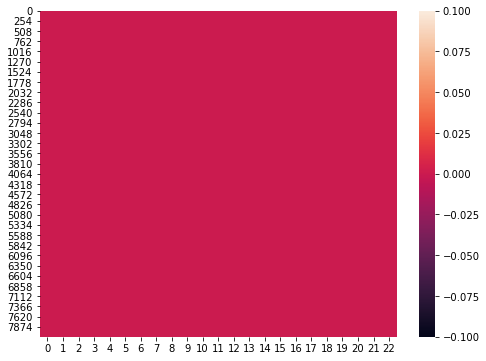

In [312]:
plt.figure(figsize=(8,6))
sns.heatmap(data.isnull())
plt.show()

In [313]:
cor=data.corr()
cor

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.298801,-0.154003,-0.146730,NaN,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
1,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.032591,-0.031659,-0.030390,NaN,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
2,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.107965,0.066050,0.068885,NaN,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
3,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.047710,0.002364,0.008057,NaN,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
4,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.458983,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
5,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.061820,0.174532,0.169407,NaN,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
6,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.116177,0.099299,0.097160,NaN,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
7,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.213775,0.274574,0.253505,NaN,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
8,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.010894,0.296548,0.278708,NaN,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
9,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.257224,-0.058299,-0.074781,NaN,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


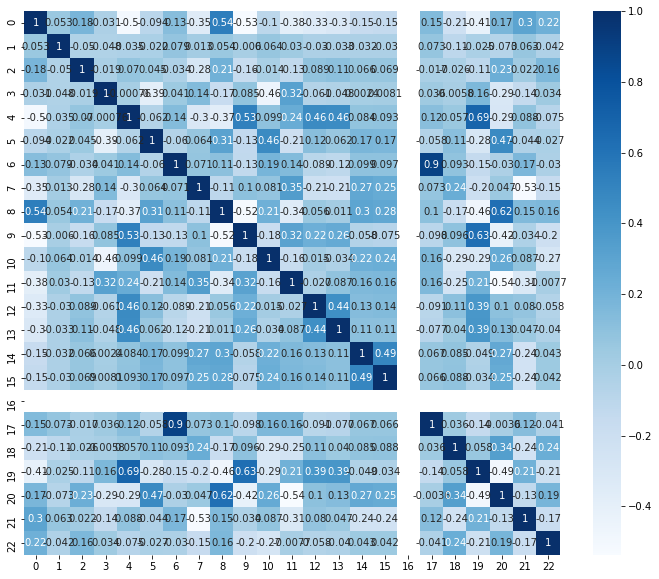

In [314]:
plt.figure(figsize=(12,10))
sns.heatmap(cor,annot=True,cmap='Blues')
plt.show()

In [315]:
x=data.iloc[:,1:23]
x

,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,22
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,5,5,0,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,5,5,0,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,5,5,0,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2


In [316]:
y=data.iloc[:,0]
y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: 0, Length: 8124, dtype: int32

In [317]:
from sklearn.decomposition import PCA
pca=PCA(n_components=10)

In [318]:
x=pca.fit_transform(x)
pd.DataFrame(data=x)

,0,1,2,3,4,5,6,7,8,9
0,0.228207,-0.345472,-1.424425,-1.246722,2.088737,2.645915,-1.032036,3.643589,-0.925812,0.366808
1,-1.936561,4.796912,-3.511668,-1.245720,0.551144,-0.283909,2.550317,-0.617764,0.232131,0.075075
2,-1.654173,2.464362,-3.880827,1.222505,1.043965,-2.052608,-2.190863,0.667470,-0.188417,0.331206
3,-1.252026,1.679664,-3.565488,0.586997,0.679516,2.792790,-0.396476,4.161473,-1.013877,-0.498926
4,1.581220,-1.002043,-1.255760,-1.970625,0.070293,3.301132,-1.258234,-2.004355,0.602214,-1.342796
...,...,...,...,...,...,...,...,...,...,...
8119,-6.469823,-2.308511,0.588111,1.118114,0.617045,1.426498,-1.800509,0.158004,0.106866,-0.649487
8120,-6.525909,-2.280695,1.431399,0.329901,0.274762,1.946724,0.208437,1.467637,-0.291823,-0.433137
8121,-1.860507,0.470244,1.190212,-0.306579,0.364383,0.053368,-2.843708,1.095501,-0.234955,-0.258984
8122,7.293068,-1.251693,-1.241976,0.781739,-1.592310,0.043870,-0.311706,1.258107,-0.316538,-0.589073


In [319]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)
x=pd.DataFrame(x)
x

,0,1,2,3,4,5,6,7,8,9
0,0.054897,-0.118582,-0.568002,-0.668399,1.208978,1.638782,-0.667436,2.575973,-0.684104,0.318468
1,-0.465855,1.646522,-1.400309,-0.667862,0.319006,-0.175843,1.649336,-0.436752,0.171527,0.065181
2,-0.397924,0.845883,-1.547514,0.655416,0.604255,-1.271309,-1.416870,0.471893,-0.139226,0.287558
3,-0.301184,0.576538,-1.421770,0.314704,0.393309,1.729751,-0.256408,2.942112,-0.749178,-0.433175
4,0.380375,-0.343948,-0.500746,-1.056502,0.040686,2.044599,-0.813722,-1.417055,0.444991,-1.165835
...,...,...,...,...,...,...,...,...,...,...
8119,-1.556366,-0.792388,0.234515,0.599449,0.357151,0.883520,-1.164421,0.111707,0.078966,-0.563894
8120,-1.569858,-0.782840,0.570783,0.176868,0.159035,1.205729,0.134800,1.037601,-0.215635,-0.376056
8121,-0.447559,0.161409,0.474607,-0.164365,0.210908,0.033054,-1.839077,0.774506,-0.173614,-0.224854
8122,1.754404,-0.429639,-0.495249,0.419110,-0.921641,0.027171,-0.201586,0.889467,-0.233897,-0.511442


In [320]:
for col in x.columns:
    if x.skew().loc[col]<-0.5:
        x[col]=np.log(x[col])

In [321]:
x.skew()

0    0.635138
1    0.574512
2    0.444208
3    0.793095
4    0.741290
5    0.189428
6   -0.053544
7   -0.097630
8    0.022523
9    0.311111
dtype: float64

In [322]:
x.shape

(8124, 10)

In [323]:
y.shape

(8124,)

In [382]:
for r_state in range(42,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    sv=SVC()
    lg=LogisticRegression()
    dtc=DecisionTreeClassifier()
    kn=KNeighborsClassifier()
    gn=GaussianNB()
    model=[sv,lg,dtc,kn,gn]
    for m in model:
        m.fit(x_train,y_train)
        m.score(x_train,y_train)
        y_pred=m.predict(x_test)
        accuracy=accuracy_score(y_test,y_pred)
        if accuracy>0.999:
            print('max accuracy score for',m,'corresponding to random state',r_state,'is',accuracy)

max accuracy score for SVC() corresponding to random state 60 is 1.0


In [383]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=60)

In [384]:
x_train.shape

(6499, 10)

In [385]:
x_test.shape

(1625, 10)

In [386]:
y_train.shape

(6499,)

In [387]:
y_test.shape

(1625,)

In [407]:
from sklearn.model_selection import GridSearchCV
dtc=DecisionTreeClassifier()
grid_param={'criterion':['gini','entropy']}
gd_sr=GridSearchCV(estimator=dtc,param_grid=grid_param,scoring='accuracy',cv=5)
gd_sr.fit(x,y)
best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

{'criterion': 'gini'}
0.885003789314134


In [408]:
from sklearn.model_selection import GridSearchCV
svc=SVC()
parameters={'kernel':['linear','rbf'],'C':[1,10]}
clf=GridSearchCV(svc,parameters,scoring='accuracy',cv=5)
clf.fit(x,y)
print(sorted(clf.cv_results_.keys()))
print(clf.best_params_)
best_result=clf.best_score_
print(best_result)

['mean_fit_time', 'mean_score_time', 'mean_test_score', 'param_C', 'param_kernel', 'params', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'std_fit_time', 'std_score_time', 'std_test_score']
{'C': 10, 'kernel': 'rbf'}
0.8854939749905266


In [409]:
from sklearn.model_selection import GridSearchCV
kn=KNeighborsClassifier()
grid_param={'n_neighbors':range(3,100)}
gd=GridSearchCV(estimator=kn,param_grid=grid_param,scoring='accuracy',cv=5)
gd.fit(x,y)
best_parameters=gd.best_params_
print(best_parameters)
best_result=gd.best_score_
print(best_result)

{'n_neighbors': 3}
0.8750314513073134


In [410]:
lg=LogisticRegression()

In [411]:
lg.fit(x_train,y_train)

LogisticRegression()

In [412]:
lg.score(x_train,y_train)

0.8272041852592706

In [413]:
predlg=lg.predict(x_test)
predlg

array([1, 0, 0, ..., 1, 0, 1])

In [414]:
print(y_test,predlg)

7339    1
7353    0
315     1
4449    1
7425    0
       ..
4034    1
8064    1
4197    0
4691    1
4605    1
Name: 0, Length: 1625, dtype: int32 [1 0 0 ... 1 0 1]


In [415]:
print("accuracy score is: ",accuracy_score(y_test,predlg))

accuracy score is:  0.8276923076923077


In [416]:
print("confusion matrix is: ",confusion_matrix(y_test,predlg))

confusion matrix is:  [[727 106]
 [174 618]]


In [417]:
print("classification_report is: ",classification_report(y_test,predlg))

classification_report is:                precision    recall  f1-score   support

           0       0.81      0.87      0.84       833
           1       0.85      0.78      0.82       792

    accuracy                           0.83      1625
   macro avg       0.83      0.83      0.83      1625
weighted avg       0.83      0.83      0.83      1625



In [431]:
sv=SVC(kernel='rbf',C=10)
dtc=DecisionTreeClassifier(criterion='gini')
kn=KNeighborsClassifier(n_neighbors=3)
gn=GaussianNB()

model=[sv,dtc,kn,gn]

for m in model:
    m.fit(x_train,y_train)
    print(m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print('Confusion matrix of',m,'is:')
    print(confusion_matrix(y_test,predm))
    print('classification_report of',m,'is:')
    print(classification_report(y_test,predm))
    print('\n')

0.9993845206954917
Accuracy score of SVC(C=10) is:
0.9993846153846154
Confusion matrix of SVC(C=10) is:
[[832   1]
 [  0 792]]
classification_report of SVC(C=10) is:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       833
           1       1.00      1.00      1.00       792

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



1.0
Accuracy score of DecisionTreeClassifier() is:
0.9944615384615385
Confusion matrix of DecisionTreeClassifier() is:
[[826   7]
 [  2 790]]
classification_report of DecisionTreeClassifier() is:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       833
           1       0.99      1.00      0.99       792

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99    

In [432]:
from sklearn.model_selection import cross_val_score
dtcscores=cross_val_score(dtc,x,y,cv=5)
print(dtcscores)
print(dtcscores.mean(),dtcscores.std())

[0.84553846 0.99569231 0.94092308 0.99815385 0.63423645]
0.8829088291019327 0.13608943739765816


In [433]:
from sklearn.model_selection import cross_val_score
svscores=cross_val_score(sv,x,y,cv=5)
print(svscores)
print(svscores.mean(),svscores.std())

[0.82892308 1.         0.96       1.         0.6385468 ]
0.8854939749905266 0.1385334486734543


In [434]:
from sklearn.model_selection import cross_val_score
knscores=cross_val_score(kn,x,y,cv=5)
print(knscores)
print(knscores.mean(),knscores.std())

[0.81661538 0.99507692 0.93292308 1.         0.63054187]
0.8750314513073134 0.13897272037874445


In [444]:
#saving best model to outer file
import pickle

filename='picklesvfile.pkl'
pickle.dump(sv,open(filename,'wb'))
model=pickle.load(open(filename,'rb'))
model.predict(x_test)

array([1, 0, 1, ..., 0, 1, 1])